In [231]:
import numpy as np
from urllib.request import urlopen
import pandas as pd
import os

## Upload Data to Python

In [232]:
# URL for the HomeWork Data (Machine Learning Repository)
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data'
"""Attribute Information:
1. L-CORE (patient's internal temperature in C):
              high (> 37), mid (>= 36 and <= 37), low (< 36)
2. L-SURF (patient's surface temperature in C):
              high (> 36.5), mid (>= 36.5 and <= 35), low (< 35)
3. L-O2 (oxygen saturation in %):
              excellent (>= 98), good (>= 90 and < 98),
              fair (>= 80 and < 90), poor (< 80)
4. L-BP (last measurement of blood pressure):
              high (> 130/90), mid (<= 130/90 and >= 90/70), low (< 90/70)
5. SURF-STBL (stability of patient's surface temperature):
              stable, mod-stable, unstable
6. CORE-STBL (stability of patient's core temperature)
              stable, mod-stable, unstable
7. BP-STBL (stability of patient's blood pressure)
              stable, mod-stable, unstable
8. COMFORT (patient's perceived comfort at discharge, measured as
              an integer between 0 and 20)
9. decision ADM-DECS (discharge decision):
              I (patient sent to Intensive Care Unit),
              S (patient prepared to go home),
              A (patient sent to general hospital floor)"""

# download the file
#This is for Row Removal
names = ['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL','Comfort', 'Desc']
df = c = pd.read_csv(url, names = names, comment ='#')


In [233]:
#make sure that the data is present and uploaded to python
df 

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,Comfort,Desc
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
5,high,low,good,mid,stable,stable,unstable,15,S
6,mid,low,excellent,high,stable,stable,mod-stable,05,S
7,high,mid,excellent,mid,unstable,unstable,stable,10,S
8,mid,high,good,mid,stable,stable,stable,10,S
9,mid,low,excellent,mid,unstable,stable,mod-stable,10,S


## Preprocessing Data

In [234]:
#this is to change all of the values to numeric, this causes the "?" in the data set to become "NaN"
df.Comfort = df.Comfort.apply(pd.to_numeric, errors = 'coerce')

In [235]:
#make sure that the values are now "NaN"
print(df.Comfort.to_string())

0     15.0
1     10.0
2     10.0
3     15.0
4     10.0
5     15.0
6      5.0
7     10.0
8     10.0
9     10.0
10    15.0
11    10.0
12    15.0
13    10.0
14    15.0
15    10.0
16    15.0
17    10.0
18    15.0
19    10.0
20    15.0
21    10.0
22    15.0
23    10.0
24    10.0
25    10.0
26    10.0
27    10.0
28    15.0
29    10.0
30    10.0
31    10.0
32    10.0
33    10.0
34    10.0
35    10.0
36    10.0
37    10.0
38     7.0
39    10.0
40    10.0
41    15.0
42    15.0
43    10.0
44    10.0
45    10.0
46     NaN
47    10.0
48     NaN
49    10.0
50    10.0
51    10.0
52    10.0
53    10.0
54    10.0
55    15.0
56    15.0
57    10.0
58    10.0
59    10.0
60    10.0
61    10.0
62    10.0
63    10.0
64    10.0
65    10.0
66    10.0
67    10.0
68    10.0
69    10.0
70     NaN
71    10.0
72    10.0
73    10.0
74    10.0
75    10.0
76    10.0
77    10.0
78    10.0
79    10.0
80    15.0
81    10.0
82    10.0
83     5.0
84    10.0
85    10.0
86    15.0
87    15.0
88    10.0
89    15.0


In [236]:
#This function drops all rows that have "NaN" for Comfort. 
#I decided to do this because comfort is very dependent on the individual patient and taking the average would not be accurate/fair
df = df.dropna()

In [237]:
#There is an error in one of data entry for A, where this is an extra "space" after the A, so this command fixes this issue
df = df.replace({'A ':'A'})

In [238]:
#check to see that rows were dropped (87X9) and to visualize all the data
print(df.to_string())

   L-CORE L-SURF       L-O2  L-BP SURF-STBL   CORE-STBL     BP-STBL  Comfort Desc
0     mid    low  excellent   mid    stable      stable      stable     15.0    A
1     mid   high  excellent  high    stable      stable      stable     10.0    S
2    high    low  excellent  high    stable      stable  mod-stable     10.0    A
3     mid    low       good  high    stable    unstable  mod-stable     15.0    A
4     mid    mid  excellent  high    stable      stable      stable     10.0    A
5    high    low       good   mid    stable      stable    unstable     15.0    S
6     mid    low  excellent  high    stable      stable  mod-stable      5.0    S
7    high    mid  excellent   mid  unstable    unstable      stable     10.0    S
8     mid   high       good   mid    stable      stable      stable     10.0    S
9     mid    low  excellent   mid  unstable      stable  mod-stable     10.0    S
10    mid    mid       good   mid    stable      stable      stable     15.0    A
11    mid    low

## Graphing and Interpretation

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt

I decided to use the Scatterplot because this allows me to visualize how many data points there are for each level of comfort for each variable. Other graph forms do not accurately represent this.

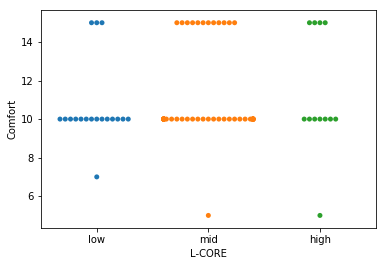

In [240]:
#L-Core vs Comfort using a scatterplot
# Scatterplot is good because it allows a visual representation of the density of comfort values among various L-CORE rating
sns.swarmplot(x=df['L-CORE'], y=df['Comfort'], data=df, order=["low","mid","high"])

This graph does not really show a general trend for level of L-Core to Comfort. The mid level of L-Core had the most amount of 10 Comfort and 15 Comfort.

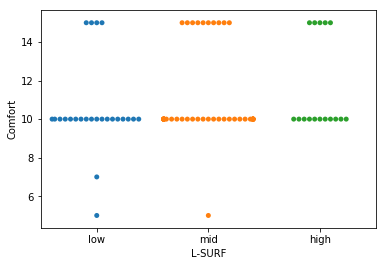

In [241]:
#L-SURF vs Comfort using a scatterplot
# Scatterplot is good because it allows a visual representation of the density of comfort values among various L-SURF rating
sns.swarmplot(x=df['L-SURF'], y=df['Comfort'], data=df, order=["low","mid","high"])

This graph showed not real correlation between comfort and level of L-Surf.

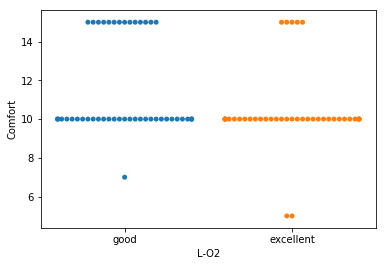

In [242]:
#L-O2 vs Comfort using a scatterplot
# Scatterplot is good because it allows a visual representation of the density of comfort values among various L-O2 rating
sns.swarmplot(x=df['L-O2'], y=df['Comfort'], data=df, order=["good","excellent"])

This graph showed that good L-O2 had a higher level of comfort compared to excellent L-O2. This is shown by more 15 Comfort in "good" compared to "excellent".

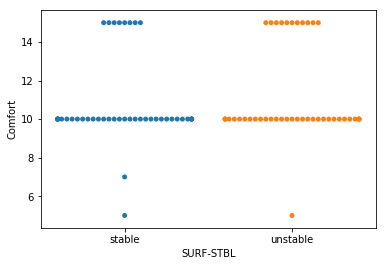

In [243]:
#SURF-STBL vs Comfort using a scatterplot
# Scatterplot is good because it allows a visual representation of the density of comfort values among various SURF-STBL rating
sns.swarmplot(x=df['SURF-STBL'], y=df['Comfort'], data=df)


This graph shows no correlation between stability and comfort.

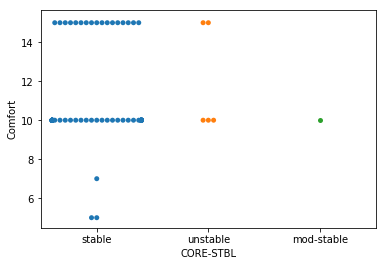

In [244]:
#CORE-STBL vs Comfort using a scatterplot
# Scatterplot is good because it allows a visual representation of the density of comfort values among various CORE-STBL rating
sns.swarmplot(x=df['CORE-STBL'], y=df['Comfort'], data=df)

This graph shows a high correlation between stability and comfort. The most stable the higher the comfort. 

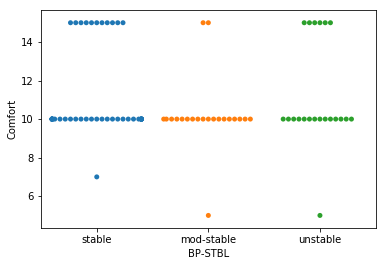

In [245]:
#BP-STBL vs Comfort using a scatterplot
# Scatterplot is good because it allows a visual representation of the density of comfort values among various BP-STBL rating
sns.swarmplot(x=df['BP-STBL'], y=df['Comfort'], data=df)

This graph shows that when the patient is more stable, they have a higher comfort level. 

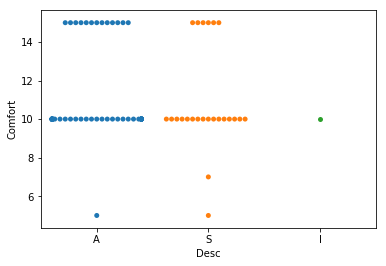

In [246]:
#Decision vs Comfort using a scatterplot
# Scatterplot is good because it allows a visual representation of the density of comfort values among various Decision rating
sns.swarmplot(x=df['Desc'], y=df['Comfort'], data=df)

This graph shows that the A has a higher percentage of comfort for the patients.